In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet # линейная регрессия с регуляризацией
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina' # для более четкой отрисовки графиков

In [ ]:
df = pd.read_excel('real_estate_data.xlsx', index_col=0) # загружаем данные
print('Размер датасета: {}'.format(df.shape))

In [ ]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.columns = ['date', 'age', 'metro_dist', 'stores', 'lat', 'lon', 'price'] # переименуем колонки

In [ ]:
df['year'] = df['date'].apply(lambda x: str(x).split('.')[0]).astype(float) # выделим год
df['month'] = df['date'].apply(lambda x: '0.'+str(x).split('.')[1]).astype(float)*12 # выделим месяц
df['month'] = df['month'].replace(0, 12)
df.drop(['date'], axis=1, inplace=True) # удалим начальную дату

In [ ]:
df.head()

,age,metro_dist,stores,lat,lon,price,year,month
No,,,,,,,,
1,32.0,84.87882,10,24.98298,121.54024,37.9,2012.0,11.0
2,19.5,306.59470,9,24.98034,121.53951,42.2,2012.0,11.0
3,13.3,561.98450,5,24.98746,121.54391,47.3,2013.0,7.0
4,13.3,561.98450,5,24.98746,121.54391,54.8,2013.0,6.0
5,5.0,390.56840,5,24.97937,121.54245,43.1,2012.0,10.0


In [ ]:
df.dtypes # проверим типы переменных

age           float64
metro_dist    float64
stores          int64
lat           float64
lon           float64
price         float64
year          float64
month         float64
dtype: object

In [ ]:
df.isna().sum() # проверим пропущенные значения

age           0
metro_dist    0
stores        0
lat           0
lon           0
price         0
year          0
month         0
dtype: int64

In [ ]:
df.describe()

,age,metro_dist,stores,lat,lon,price,year,month
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,2012.695652,6.251208
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,0.460687,3.418322
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,2012.000000,1.000000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,2012.000000,4.000000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,2013.000000,6.000000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,2013.000000,9.000000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,2013.000000,12.000000


<AxesSubplot:xlabel='price'>

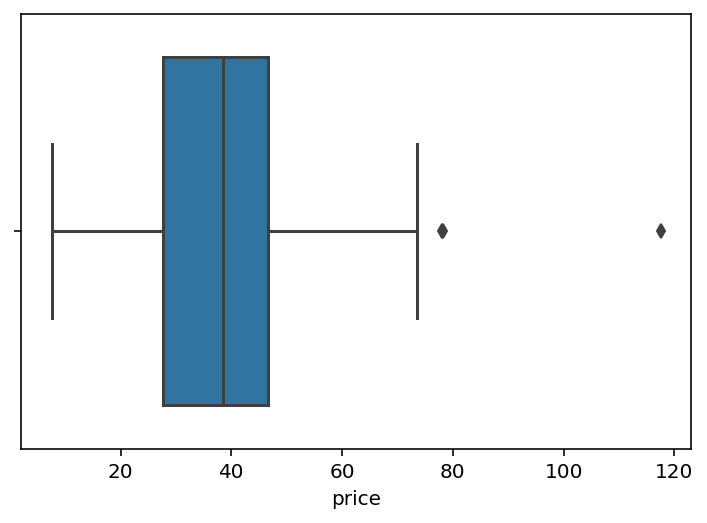

In [ ]:
sns.boxplot(x = df['price']) # есть выбросы в данных

In [ ]:
df['Y'].quantilie(0.97)# найти выброс

df['Y'].index[индекс выброса]
df.drop('Y', axis = 0) # удаление строки 
for i in df['Y']:
  if df['Y'].index == index выброса:
    df.drop( , axis = 0)

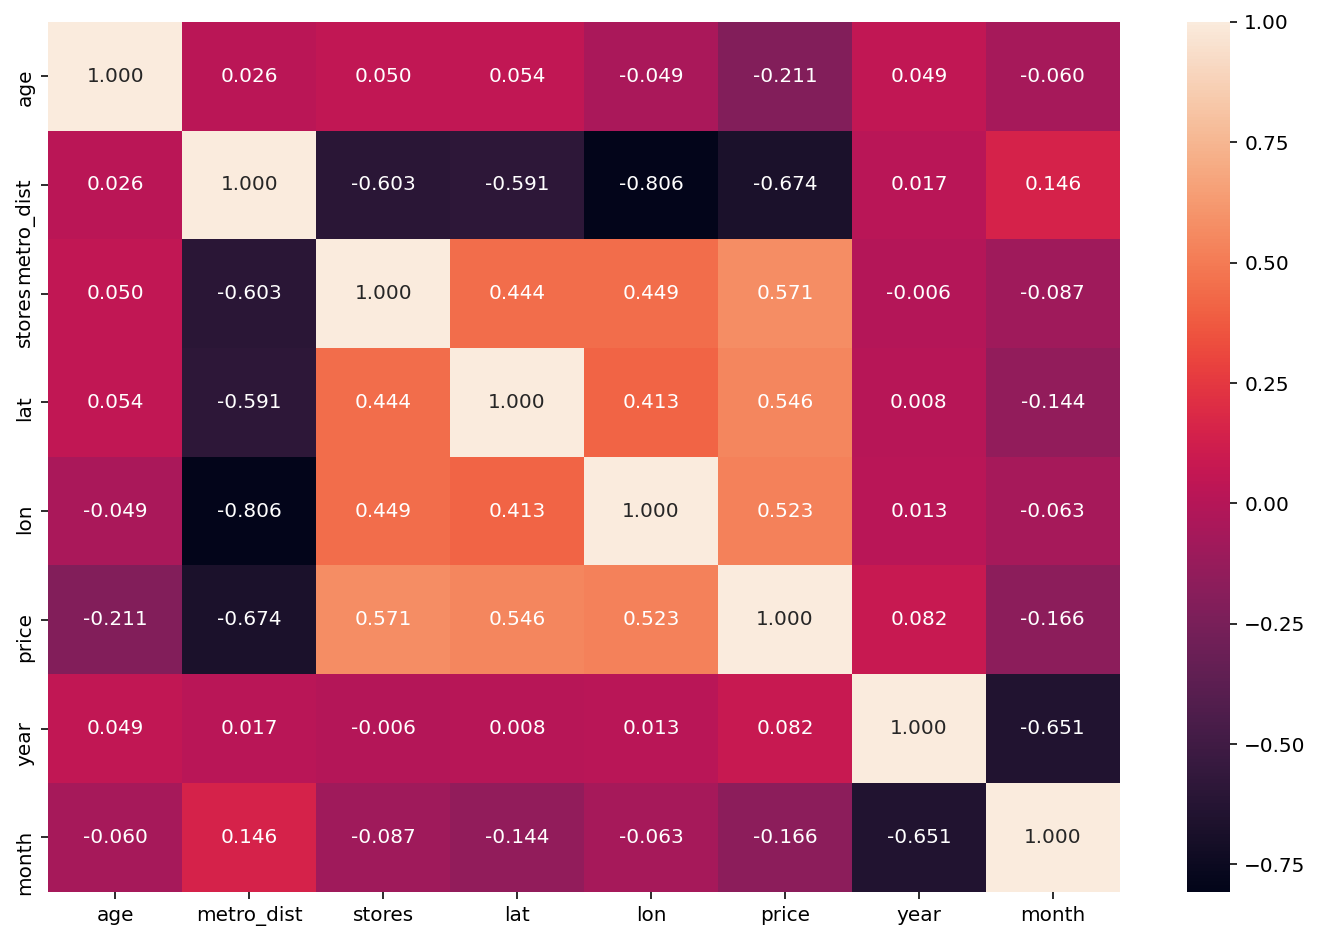

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap = 'coolwarm', ax=ax);

Наибольшая корреляция с целевым признаком у признака "расстояние до метро"

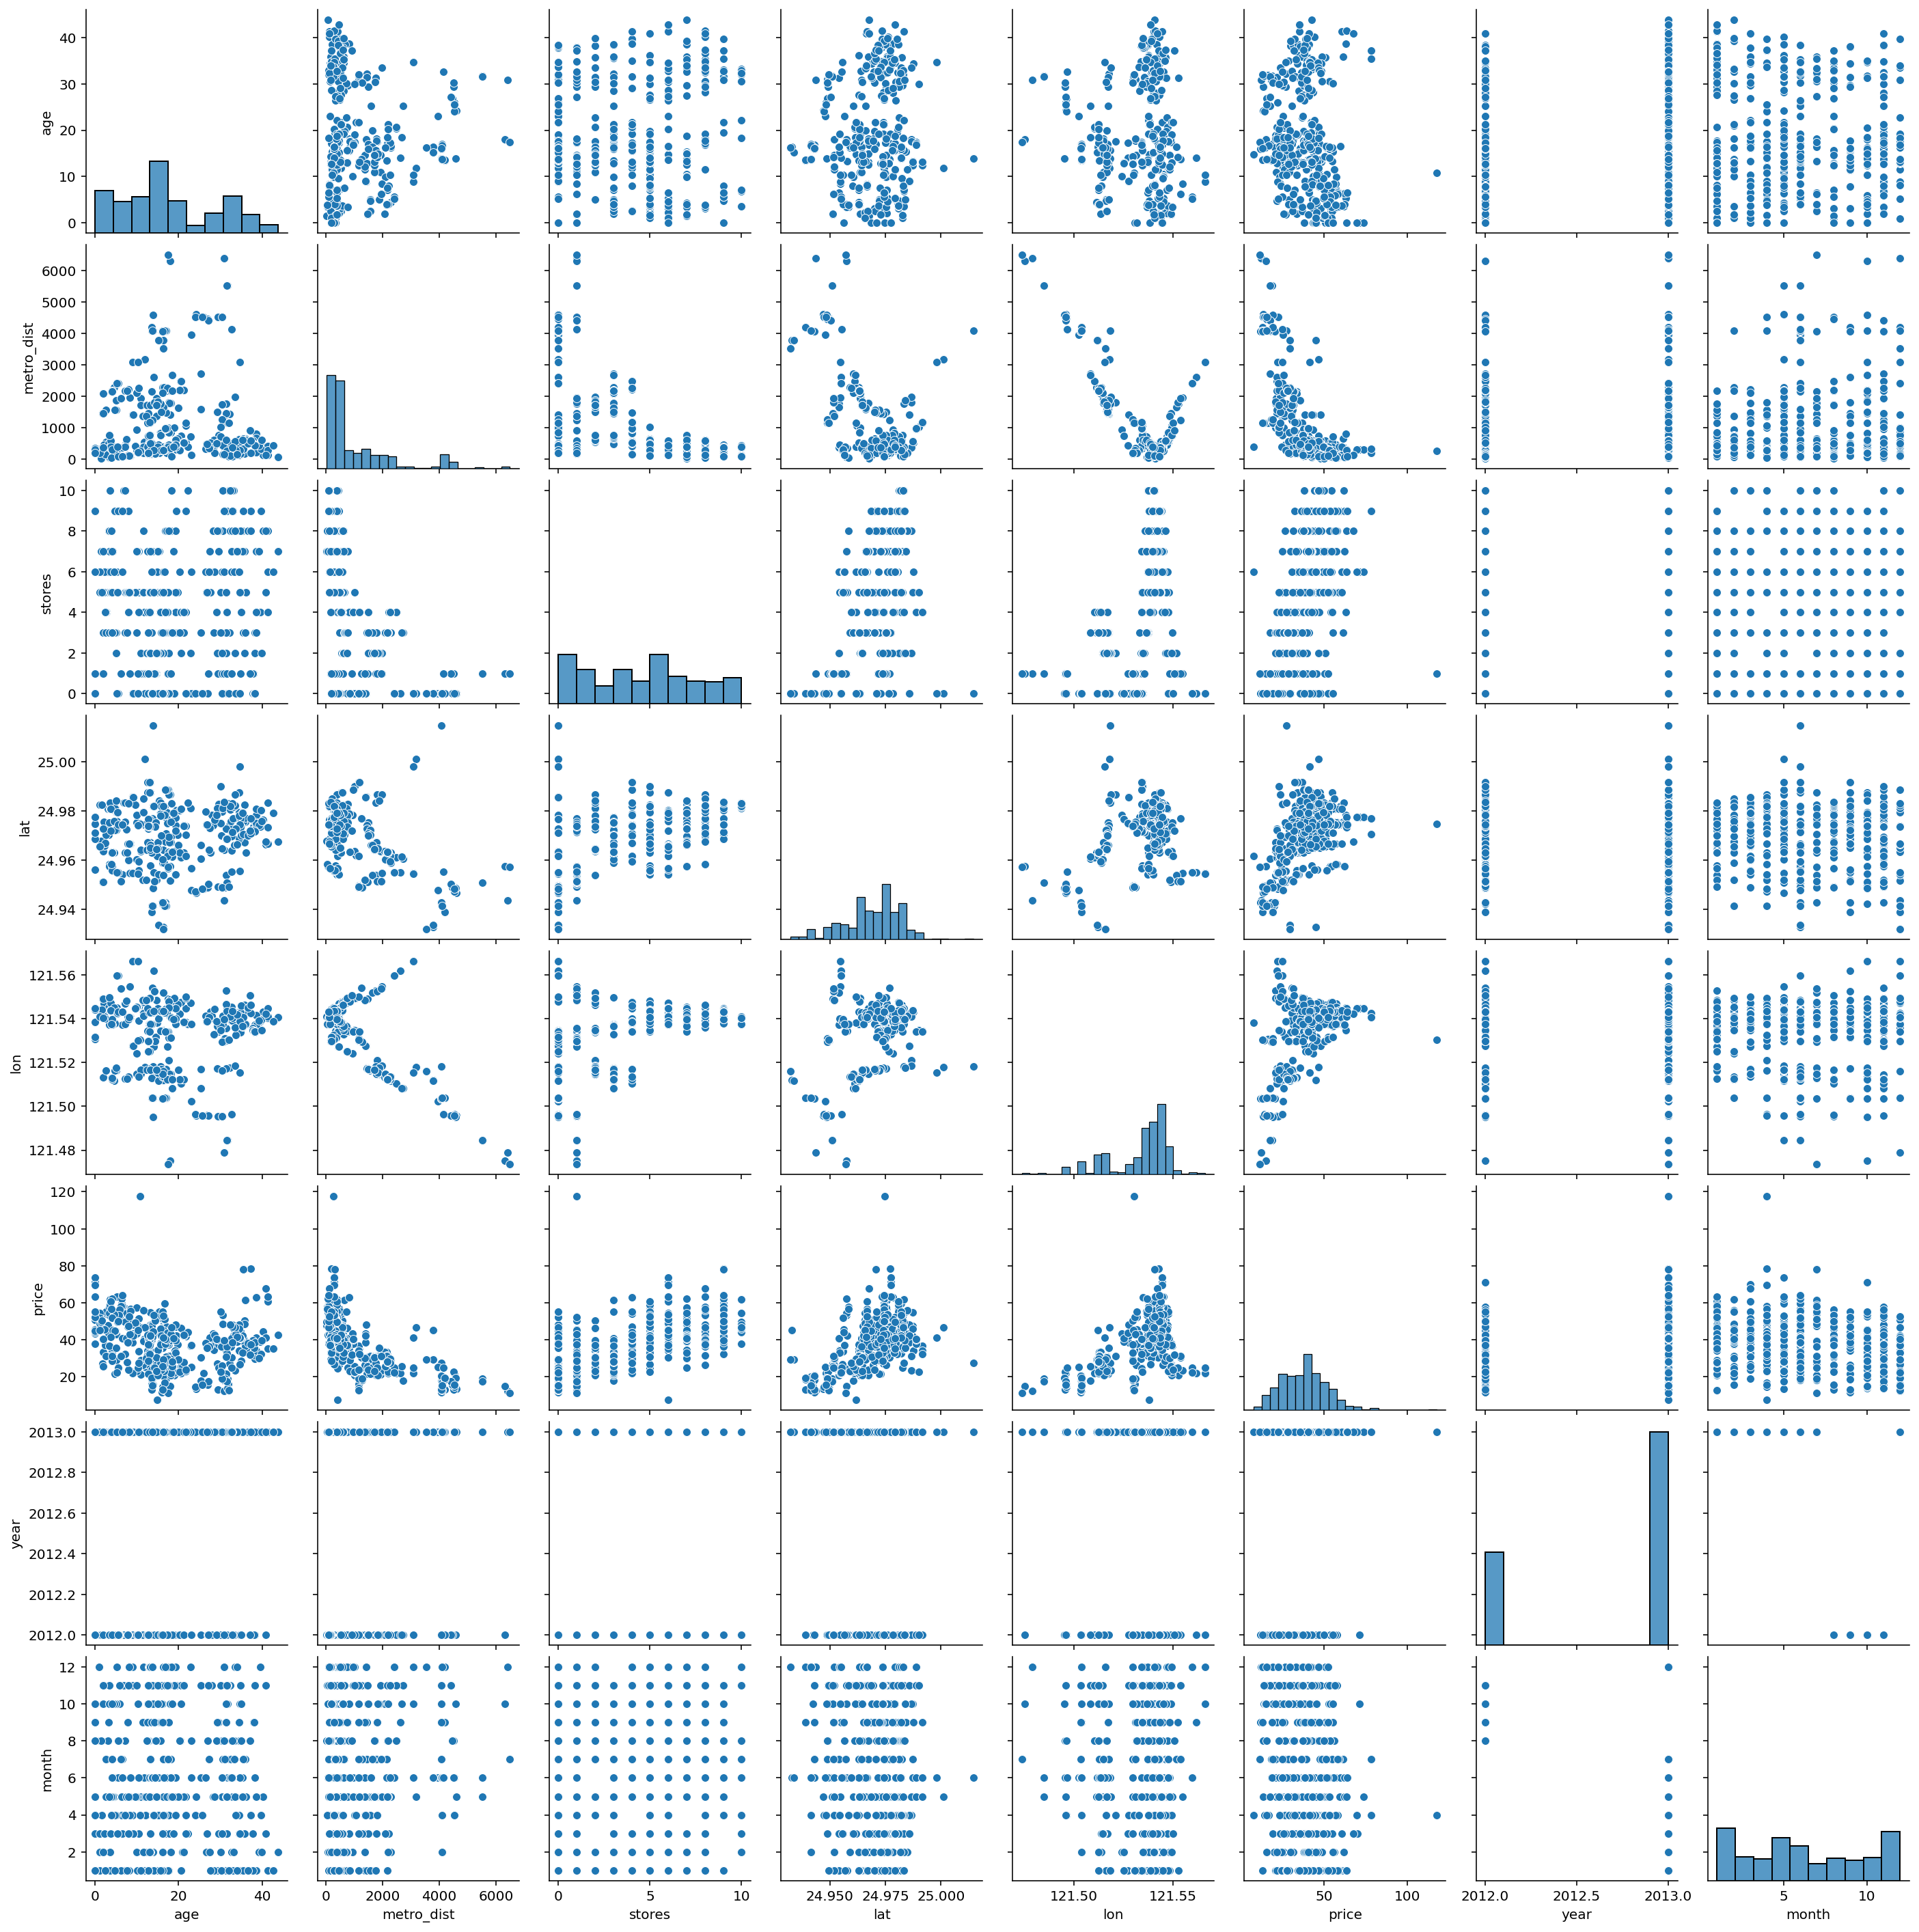

In [ ]:
sns.pairplot(df); # посмотрим на распределние всех признаков

Линейная регрессия очень чувствительна к разным масштабам данных, поэтому перед применением алгоритма масштабируем/стандартизируем данные:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), 
                                                    df['price'],
                                                    test_size=0.3
                                                   )

In [ ]:
x_train.describe()

,age,metro_dist,stores,lat,lon,year,month
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,17.711765,1094.282697,4.169550,24.969217,121.532808,2012.719723,6.148789
std,11.346322,1272.805238,2.943149,0.012481,0.015429,0.449913,3.428132
min,0.000000,49.661050,0.000000,24.932070,121.475160,2012.000000,1.000000
25%,9.900000,289.324800,1.000000,24.962990,121.525180,2012.000000,4.000000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,2013.000000,6.000000
75%,28.600000,1559.827000,6.000000,24.978450,121.543100,2013.000000,9.000000
max,41.400000,6396.283000,10.000000,25.001150,121.566270,2013.000000,12.000000


In [ ]:
scl = RobustScaler()
x_train_scl = scl.fit_transform(x_train)
x_test_scl = scl.transform(x_test)

In [ ]:
model = ElasticNet(random_state=17)
cv = KFold(n_splits=7) # схема для кросс-валидации

cv_score = cross_val_score(model, 
                           x_train, y_train, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, n_jobs=-1) # прогоняем модель на кросс-валидации
print('MAE на кросс-валидации: %.3f+-%.3f'% (abs(np.mean(cv_score)), np.std(cv_score)))

MAE на кросс-валидации: 6.810+-1.320


In [ ]:
params = {'alpha': (0.1, 0.5, 1), 
          'l1_ratio': (0.1, 0.5, 0.9)}
model_grid = GridSearchCV(model, 
                          param_grid=params, 
                          scoring='neg_mean_absolute_error', 
                          n_jobs=-1, cv=cv)
model_grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=7, random_state=None, shuffle=False),
             estimator=ElasticNet(random_state=17), n_jobs=-1,
             param_grid={'alpha': (0.1, 0.5, 1), 'l1_ratio': (0.1, 0.5, 0.9)},
             scoring='neg_mean_absolute_error')

In [ ]:
print('Лучшая модель на кросс-валидации с параметрами {} и MAE {}'.format(model_grid.best_params_, 
                                                                        abs(model_grid.best_score_)))

best_model = model_grid.best_estimator_

Лучшая модель на кросс-валидации с параметрами {'alpha': 0.5, 'l1_ratio': 0.1} и MAE 6.795583576971276


In [ ]:
best_model.fit(x_train_scl, y_train)
print('MAE на тестовой выборке: %.3f' % mean_absolute_error(y_test, best_model.predict(x_test_scl)))

MAE на тестовой выборке: 6.508
